In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

Extracting Unique Recipes for content based filtering:

In [5]:
df = pd.read_csv('Final_Processed_Dataset.csv')
unique_df = df.drop_duplicates(subset='RecipeId', keep='first').reset_index(drop=True)

TF-IDF Vectorization:

In [6]:
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(unique_df['RecipeIngredientParts'])

Computing Cosine Similarity and Indexing:

In [7]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
indices = pd.Series(unique_df.index, index=unique_df['Name']).drop_duplicates()

Recommendation Function:

In [8]:
def get_recommendations(title, cosine_sim=cosine_sim):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)  # Sort by similarity score
    sim_scores = sim_scores[1:6]
    recipe_indices = [i[0] for i in sim_scores]
    
    recommended_recipes = set()
    unique_recipes = []
    
    for i in recipe_indices:
        recipe_title = unique_df['Name'].iloc[i]
        if recipe_title not in recommended_recipes:
            unique_recipes.append(recipe_title)
            recommended_recipes.add(recipe_title)
    
    return unique_recipes

Printing Recommendations:

In [9]:
print(get_recommendations('Brownie Pudding'))
print(get_recommendations('Brown Bag Apple Salad'))
print(get_recommendations('Chicken Curry'))

['Chocolate Pudding Cake', 'Apricot Squares', 'Chocolate Doughnuts', 'Hot Fudge Pudding Cake II', 'Fresh Peach Upside Down Cake']
['Chocolate Coated Orange Peels', 'Yankee Grapefruit Meringue Pie', 'Summer Fruit Bowl', 'Hemingway Special- a Caribbean Inspired Cocktail', 'Chicken Waldorf Salad']
['Chicken Biryani II', 'Exotic and Sweet Moroccan Chicken with Spicy Rice', 'Easy African Sweet Potato Patties', 'Indian Corn Pilaf', 'Basmati Rice with Vegetables']


Calculation of Diversity Ratio:

In [10]:
recommendations = {}
for title in unique_df['Name']:
    recs = get_recommendations(title)
    recommendations[title] = recs

num_unique_items = len(set(item for sublist in recommendations.values() for item in sublist))
num_recommendations = sum(len(recs) for recs in recommendations.values())
diversity_ratio = num_unique_items / num_recommendations

print("Diversity Ratio:", diversity_ratio)

Diversity Ratio: 0.17871140939597316


Analysis of Results using Cosine Similary Heatmap:

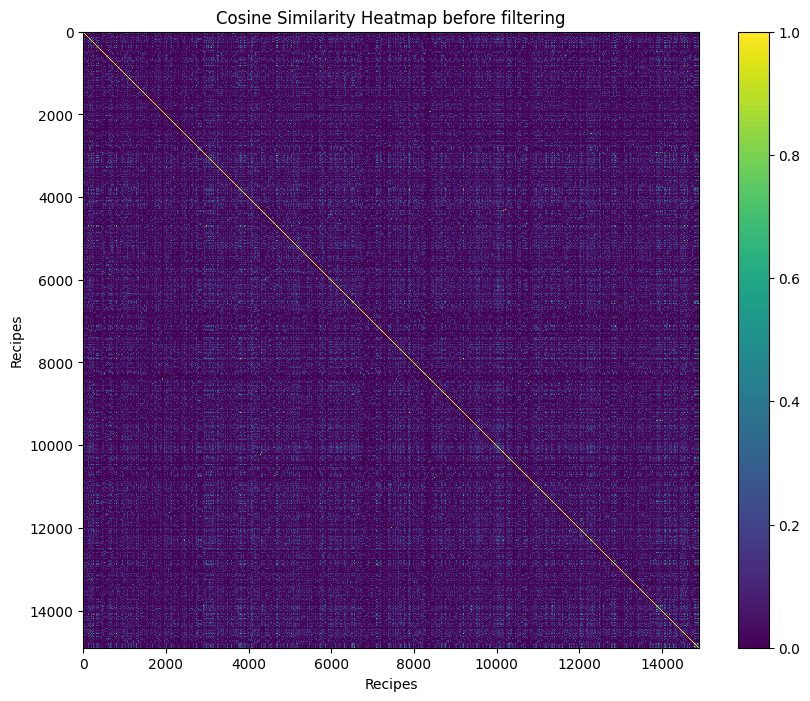

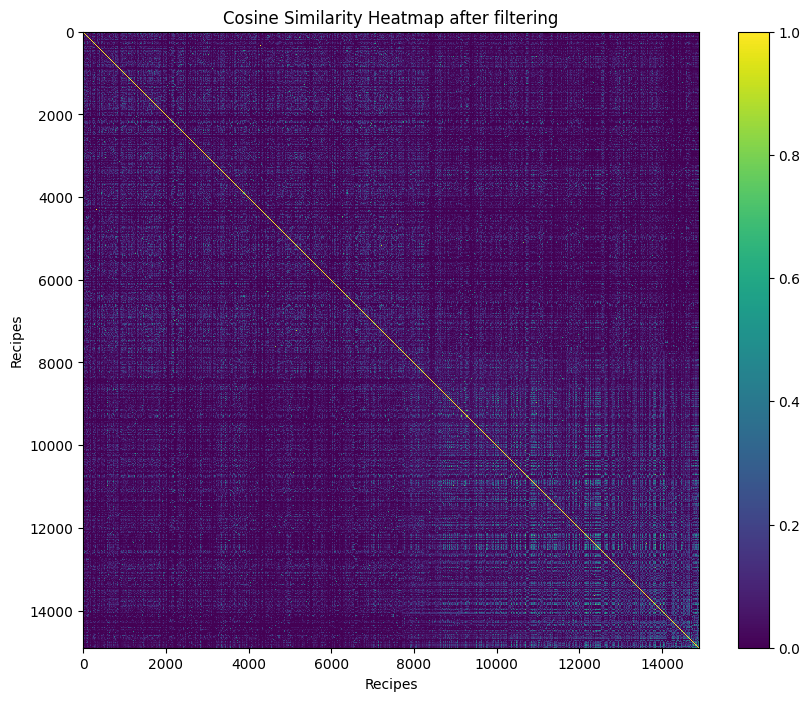

In [17]:
plt.figure(figsize=(10, 8))
plt.imshow(cosine_sim, cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.title('Cosine Similarity Heatmap before filtering')
plt.xlabel('Recipes')
plt.ylabel('Recipes')
plt.show()

similarity_scores = cosine_sim.argsort()
#this is a very big data do it just for the first 100 recipes
similarity_scores = similarity_scores[:100]
sorted_df = unique_df.iloc[similarity_scores.flatten()]
sorted_df = sorted_df.reset_index(drop=True)

new_tfidf = TfidfVectorizer()
new_tfidf_matrix = new_tfidf.fit_transform(sorted_df['RecipeIngredientParts'])
new_cosine_sim = linear_kernel(new_tfidf_matrix, new_tfidf_matrix)
plt.figure(figsize=(10, 8))
plt.imshow(new_cosine_sim, cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.title('Cosine Similarity Heatmap after filtering')
plt.xlabel('Recipes')
plt.ylabel('Recipes')
plt.show()
